# **Estandarizacion**

In [23]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_estandarizacion as fe

In [24]:
df = pd.read_csv("../datos/df_madrid_nonulls_encoded_sinout.csv", index_col=0)
df.shape

(339, 21)

In [25]:
pd.set_option("display.max_columns", None)
modelos_estand = ["standar", "robust", "minmax"]
df_estand, dic_scaler = fe.estandarizacion(df, df.columns, modelos_estand)
df_estand.head()

,price,size,municipality,distance,floor,hasLift,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_True,price_standar,size_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,rooms_0_standar,rooms_1_standar,rooms_2_standar,rooms_3_standar,rooms_4_standar,bathrooms_1_standar,bathrooms_2_standar,bathrooms_3_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar,price_robust,size_robust,municipality_robust,distance_robust,floor_robust,hasLift_robust,rooms_0_robust,rooms_1_robust,rooms_2_robust,rooms_3_robust,rooms_4_robust,bathrooms_1_robust,bathrooms_2_robust,bathrooms_3_robust,propertyType_chalet_robust,propertyType_countryHouse_robust,propertyType_duplex_robust,propertyType_flat_robust,propertyType_penthouse_robust,propertyType_studio_robust,exterior_True_robust,price_minmax,size_minmax,municipality_minmax,distance_minmax,floor_minmax,hasLift_minmax,rooms_0_minmax,rooms_1_minmax,rooms_2_minmax,rooms_3_minmax,rooms_4_minmax,bathrooms_1_minmax,bathrooms_2_minmax,bathrooms_3_minmax,propertyType_chalet_minmax,propertyType_countryHouse_minmax,propertyType_duplex_minmax,propertyType_flat_minmax,propertyType_penthouse_minmax,propertyType_studio_minmax,exterior_True_minmax
0,750.0,60.0,705.633132,7037.0,697.639893,702.271674,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.933715,0.178464,0.738475,-0.682481,0.472951,0.951320,-0.411054,1.350926,-0.764272,-0.391230,0.0,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,0.555556,0.20,0.430012,-0.236608,0.067210,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.506329,1.000000,0.121497,0.675019,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,750.0,70.0,701.404755,16145.0,678.663637,687.633544,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.933715,0.741247,0.276478,0.001239,-0.972445,-0.789256,-0.411054,-0.740233,1.308434,-0.391230,0.0,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,0.555556,0.60,0.000000,0.229847,-0.756615,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.632911,0.916812,0.282949,0.204494,0.487741,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,400.0,67.0,654.804079,55041.0,696.091764,687.633544,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-4.737695,0.572412,-4.815161,2.921085,0.355032,-0.789256,-0.411054,-0.740233,1.308434,-0.391230,0.0,-3.269504,3.269504,0.0,-0.054393,-0.054393,-0.199693,-1.908883,5.735852,-0.406138,0.473103,-3.333333,0.48,-4.739132,2.221858,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.000000,0.594937,0.000000,0.972435,0.636632,0.487741,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,590.0,70.0,679.524689,56596.0,670.416382,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.658929,0.741247,-2.114161,3.037816,-1.600627,-0.789256,-0.411054,-0.740233,-0.764272,2.556039,0.0,-3.269504,3.269504,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,-1.222222,0.60,-2.225129,2.301495,-1.114657,0.000000,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542857,0.632911,0.486348,1.000000,0.000000,0.487741,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,684.0,45.0,705.633132,10656.0,670.416382,673.696038,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.135751,-0.665712,0.738475,-0.410810,-1.600627,-2.446523,2.432769,-0.740233,-0.764272,-0.391230,0.0,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,-1.908883,-0.174342,2.462214,0.473103,-0.177778,-0.40,0.430012,-0.051265,-1.114657,-0.952

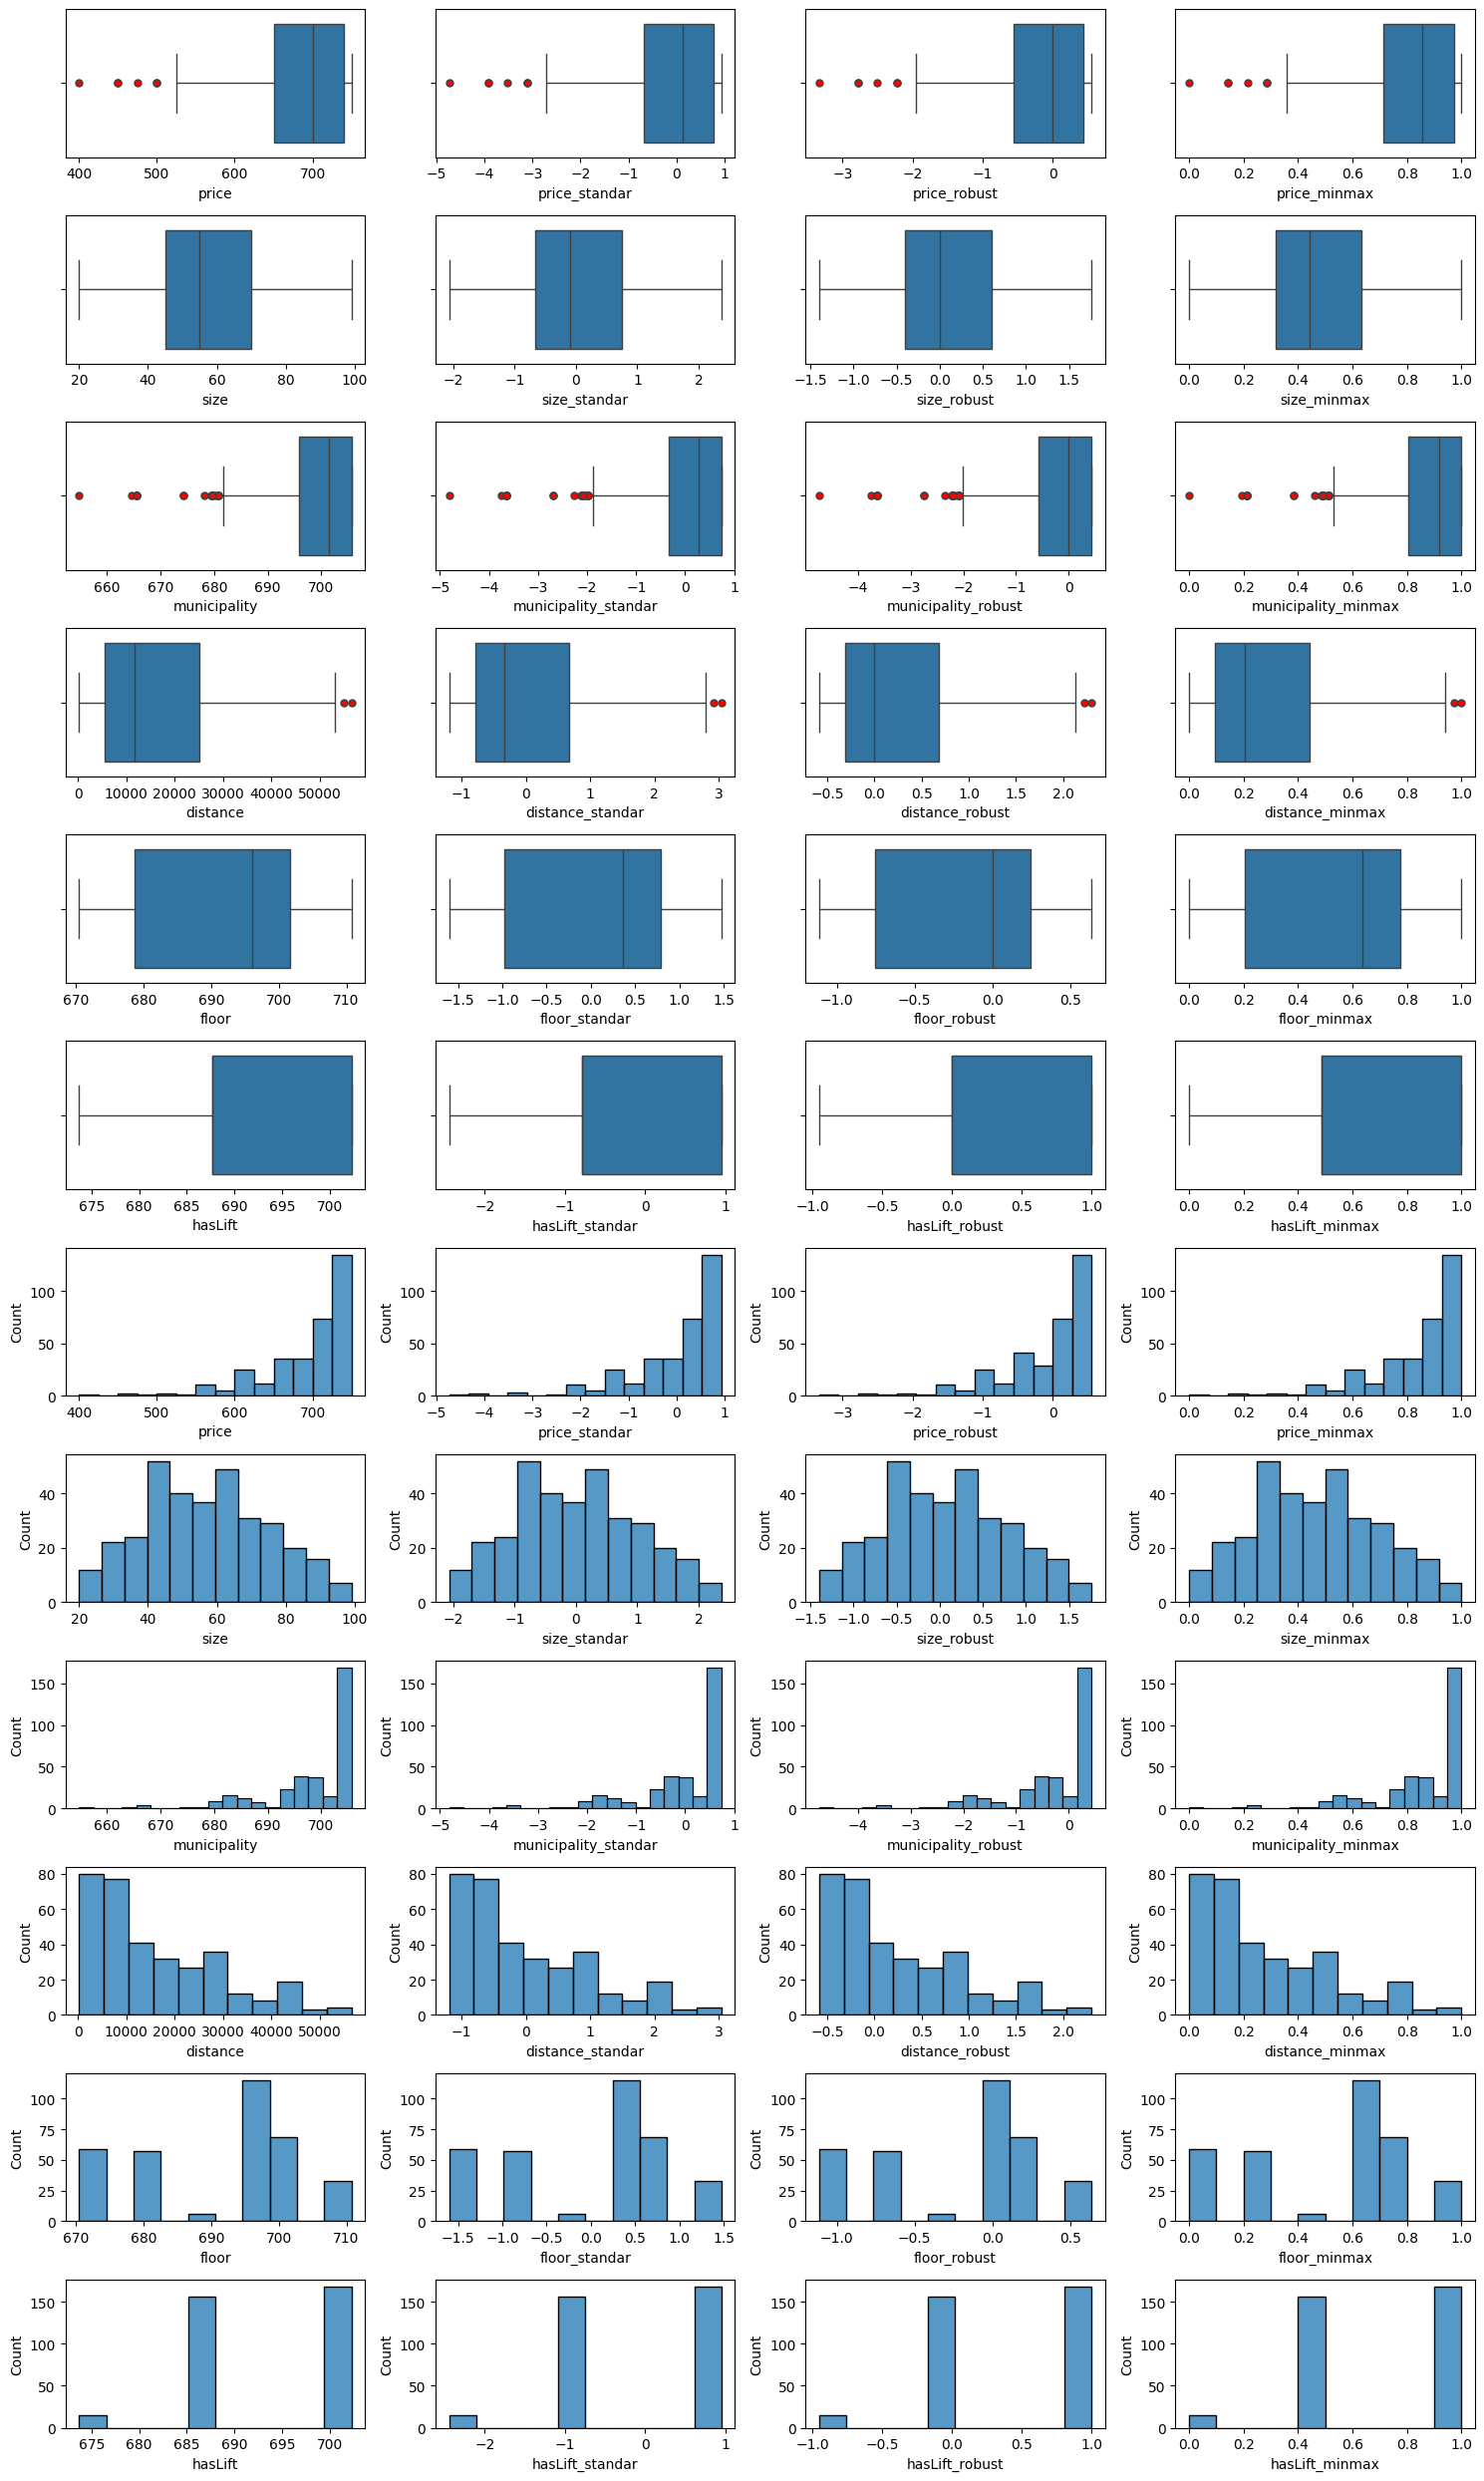

In [26]:
columnas = ['price', 'size', 'municipality', 'distance', 'floor', 'hasLift']
fe.visualizacion_boxplot_hisplot_estand(df_estand, columnas, modelos_estand)

Es complicado saber que método de estandarización es el mejor, tenemos algunos outliers pero no demasiados por lo que vamos a probar primero el standar scaler, sin embargo, también podría ser una opción el robust y por último probaría el minmax ya que los outliers aunque sean pocos podría no hacerse una correcta estandarización. Por lo que para este primer modelo nos quedamos con el StandardScaler.

In [27]:
scaler="standar"
vr = "price"
df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}|{vr}", case=False)].drop(columns=[f"{vr}_{scaler}"])
df_scaled.head(2)


,price,size_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,rooms_0_standar,rooms_1_standar,rooms_2_standar,rooms_3_standar,rooms_4_standar,bathrooms_1_standar,bathrooms_2_standar,bathrooms_3_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar,price_robust,price_minmax
0,750.0,0.178464,0.738475,-0.682481,0.472951,0.951320,-0.411054,1.350926,-0.764272,-0.39123,0.0,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,0.555556,1.0
1,750.0,0.741247,0.276478,0.001239,-0.972445,-0.789256,-0.411054,-0.740233,1.308434,-0.39123,0.0,0.305857,-0.305857,0.0,-0.054393,-0.054393,-0.199693,0.523866,-0.174342,-0.406138,0.473103,0.555556,1.0


In [28]:
with open('../datos/preprocesamiento/standar_scaler.pkl', 'wb') as f:
    pickle.dump(dic_scaler["standar"], f)

In [29]:
df_scaled.to_csv("../datos/df_madrid_nonulls_encoded_sinout_estand.csv")